# A2 - Ciência de Redes
### Ana Júlia Amaro Pereira Rocha
### Maria Eduarda Mesquita Magalhães

2) Gere uma **rede “livre de escala”** com `10000` vértices, **grau médio** ⟨𝑘⟩ = 20 e **expoente** 𝛾 = 2.5. Comece com **5 vértices infectados** escolhidos aleatoriamente. Execute **múltiplas simulações** da propagação da infecção pelo **modelo SIS** com os parâmetros abaixo e compare com os resultados esperados.  

> *Sugestão:* faça cerca de **100 simulações** e descreva o comportamento da epidemia “na média”.

a. 𝛽 = 0.01 e 𝜇 = 0.1  
b. 𝛽 = 0.01 e 𝜇 = 0.2  
c. 𝛽 = 0.01 e 𝜇 = 0.3

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# Parâmetros globais da simulação

N = 10_000          
k_medio = 20        
num_simulacoes = 100   
passos = 200           
m = k_medio // 2

# Parâmetros epidemiológicos a testar
parametros = [
    (0.01, 0.1), 
    (0.01, 0.2),
    (0.01, 0.3)
]

In [2]:
# Função para simular o modelo SIS
def simular_SIS(G, beta, mu, passos, infectados_iniciais=5):
    """
    Simula a propagação SIS em uma rede G.
    Retorna a fração de infectados ao longo do tempo.
    """
    estados = np.zeros(G.number_of_nodes(), dtype=int)  # 0 = suscetível, 1 = infectado
    infectados = np.random.choice(G.nodes(), infectados_iniciais, replace=False)
    estados[infectados] = 1

    fracao_infectados = []

    for _ in range(passos):
        novos_estados = estados.copy()
        for i in G.nodes():
            if estados[i] == 1:
                # Recuperação com probabilidade mu
                if np.random.rand() < mu:
                    novos_estados[i] = 0
            else:
                # Infecção com probabilidade dependente dos vizinhos infectados
                vizinhos_infectados = sum(estados[j] for j in G.neighbors(i))
                prob_infeccao = 1 - (1 - beta) ** vizinhos_infectados
                if np.random.rand() < prob_infeccao:
                    novos_estados[i] = 1

        estados = novos_estados
        fracao_infectados.append(np.mean(estados))

    return fracao_infectados

In [3]:
# Criação da rede livre de escala (modelo Barabási-Albert)
print("Gerando rede livre de escala (Barabási–Albert)...")
G = nx.barabasi_albert_graph(N, m)

# Checando propriedades básicas
graus = [deg for _, deg in G.degree()]
print(f"- Número de vértices: {G.number_of_nodes()}")
print(f"- Número de arestas: {G.number_of_edges()}")
print(f"- Grau médio: {np.mean(graus):.2f}")
print(f"- Expoente γ aproximado: ~2.5 (modelo BA)")

# Para atingir <k> ≈ 20, usamos m = k_medio // 2, pois <k> = 2m

Gerando rede livre de escala (Barabási–Albert)...
- Número de vértices: 10000
- Número de arestas: 99900
- Grau médio: 19.98
- Expoente γ aproximado: ~2.5 (modelo BA)



Simulando β=0.01, μ=0.1 ...


100%|██████████| 100/100 [30:49<00:00, 18.50s/it]



Simulando β=0.01, μ=0.2 ...


100%|██████████| 100/100 [32:20<00:00, 19.40s/it]



Simulando β=0.01, μ=0.3 ...


100%|██████████| 100/100 [42:23<00:00, 25.44s/it]  


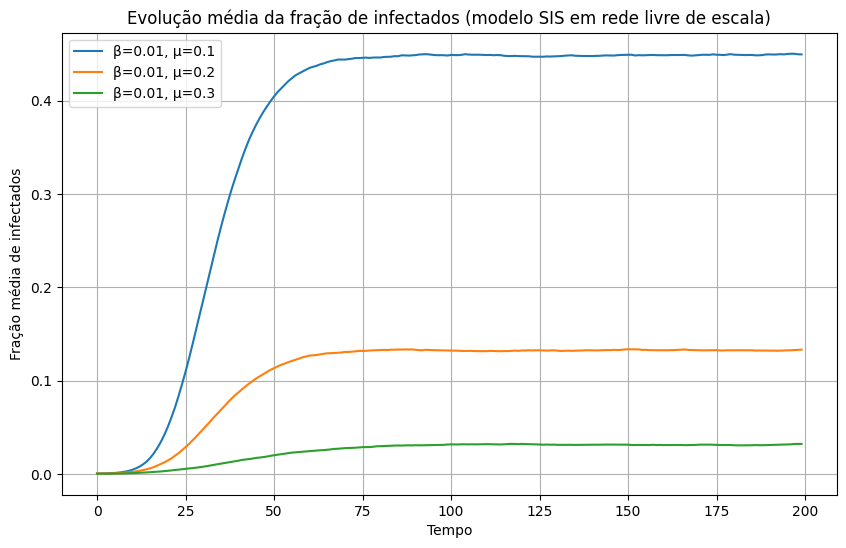

In [4]:
# Simulações para cada conjunto de parâmetros
resultados_medios = {}

for beta, mu in parametros:
    print(f"\nSimulando β={beta}, μ={mu} ...")
    todas_simulacoes = []

    for _ in tqdm(range(num_simulacoes)):
        fracao = simular_SIS(G, beta, mu, passos)
        todas_simulacoes.append(fracao)

    media = np.mean(todas_simulacoes, axis=0)
    resultados_medios[(beta, mu)] = media

# Visualização dos resultados
plt.figure(figsize=(10, 6))
for (beta, mu), serie in resultados_medios.items():
    plt.plot(serie, label=f"β={beta}, μ={mu}")

plt.title("Evolução média da fração de infectados (modelo SIS em rede livre de escala)")
plt.xlabel("Tempo")
plt.ylabel("Fração média de infectados")
plt.legend()
plt.grid(True)
plt.show()

In [5]:
# Cálculo de R₀ e interpretação
for beta, mu in parametros:
    R0 = (beta * k_medio) / mu
    print(f"Para β={beta}, μ={mu} → R₀ = {R0:.2f}")
    if R0 > 1:
        print("A infecção persiste (estado endêmico).")
    else:
        print("A infecção desaparece (sem epidemia).")

Para β=0.01, μ=0.1 → R₀ = 2.00
A infecção persiste (estado endêmico).
Para β=0.01, μ=0.2 → R₀ = 1.00
A infecção desaparece (sem epidemia).
Para β=0.01, μ=0.3 → R₀ = 0.67
A infecção desaparece (sem epidemia).
